In [47]:
# import pandas for data wrangling
import pandas as pd

# import numpy for Scientific computations
import numpy as np

# import machine learning libraries
import xgboost as xgb

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

#import packages for evaluation.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#import package for visualisation
import matplotlib.pyplot as plt

In [2]:
def score(P,T):
 print('R-squared:', r2_score(T,P))
 print('Mean squared error:', mean_squared_error(T,P))
 print('Mean absolute error:', mean_absolute_error(T,P))
 plt.figure(figsize=(25,15))
 plt.plot(np.array(T),label="Actual_values")
 plt.plot(P,label="Predicted_values")
 plt.grid=True
 plt.ylabel('compressive_strength',fontsize=25)
 legend=plt.legend()

In [3]:
train=pd.read_excel('dataset.xlsx').drop(['Compressive\nstrength tests', 'Elastic\nmodulus tests',
       'Flexural\nstrength tests', 'Splitting\ntensile strength tests'],axis=1)
target_col='Compressive\nstrength (f’c) (MPa)'
features=list(train.columns)
train=train.dropna(how='all')

In [4]:
X=train.drop([target_col],axis=1)
y=train[target_col]

In [39]:
space={
        'learning_rate':    hp.choice('learning_rate',[1,2,3,4]),
        'max_depth':        hp.choice('max_depth',np.arange(2,5, 1, dtype=int)),
        'n_estimators':208,
        'subsample':hp.choice('subsample',np.arange(0.2,0.7, 0.1)),
        'base_score':0.5,
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1)
    }

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =37)

In [7]:
def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth =space['max_depth'],
                    reg_lambda = 1 ,min_child_weight=space['min_child_weight'],
                    learning_rate=space['learning_rate'],base_score=space['base_score'],subsample=space['subsample'])
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation,
            verbose=False)
    

    pred = clf.predict(X_test)
    error = mean_absolute_error(y_test, pred)
    print ("Error:",error)
    return {'loss':error, 'status': STATUS_OK }

In [8]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

Error:                                                                                                                 
18.870266575479206                                                                                                     
Error:                                                                                                                 
7.843273809275049                                                                                                      
Error:                                                                                                                 
4.58116825994504e+18                                                                                                   
Error:                                                                                                                 
5.213009420504235                                                                                                      
Error:                                  

Error:                                                                                                                 
5.249822132329273                                                                                                      
Error:                                                                                                                 
6.802656177350669                                                                                                      
Error:                                                                                                                 
6.0119659783430155                                                                                                     
Error:                                                                                                                 
5.40519183675195                                                                                                       
Error:                                  

Error:                                                                                                                 
5.325283466266218                                                                                                      
Error:                                                                                                                 
5.700196396651541                                                                                                      
Error:                                                                                                                 
5.428456484314742                                                                                                      
Error:                                                                                                                 
5.228326200254404                                                                                                      
Error:                                  

In [14]:
print((best_hyperparams))

{'learning_rate': 3, 'max_depth': 2, 'min_child_weight': 3.0, 'reg_lambda': 2, 'subsample': 3}


In [46]:
#Trial And Error used for finding optimum parameters.
Ps={'learning_rate':0.12, 'max_depth':4, 'min_child_weight':0.2, 'reg_lambda': 0.0019, 'subsample': 0.904,
    'gamma':0.635,'n_estimators':208,'base_score':0.5,'booster':'gbtree'}

In [41]:
from sklearn.model_selection import cross_val_score
model=xgb.XGBRegressor(**Ps)

R-squared: 0.7929063748822969
Mean squared error: 49.72231351609023
Mean absolute error: 4.954856935974897


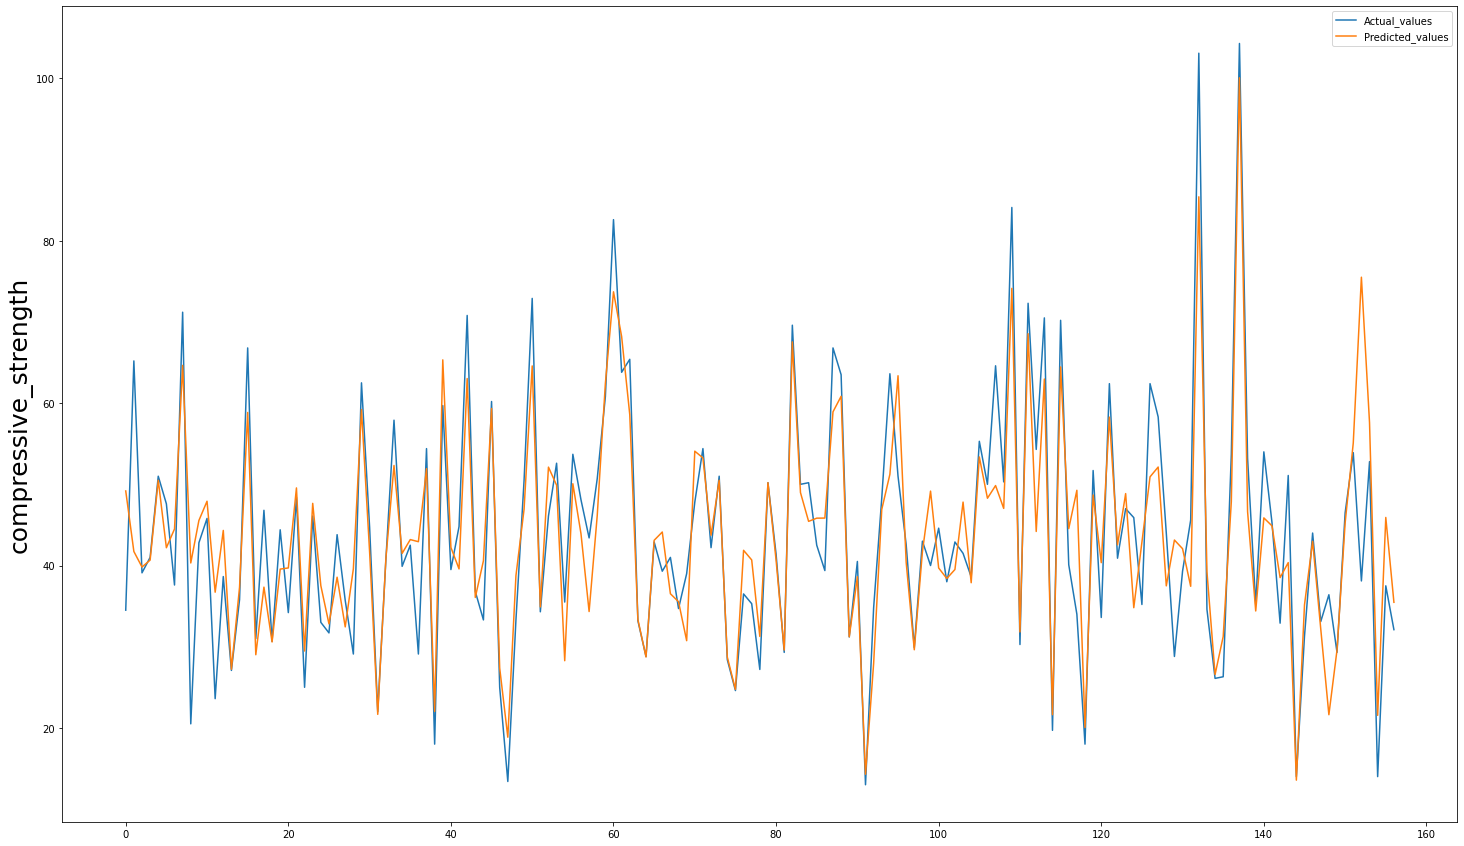

In [42]:
model.fit(X_train,y_train)
test_pred=model.predict(X_test)
score(test_pred,y_test)